In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
inicio = time.time()

In [65]:
class AntColonyOptimization:
    def __init__(self, num_ants, num_iterations, num_cities, alpha=1.0, beta=1.0, rho=0.5, q=100):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.num_cities = num_cities
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
        self.distances = np.zeros((num_cities, num_cities))
        self.pheromone = np.ones((num_cities, num_cities))
        self.ants = np.full((num_ants, num_cities), -1)
        self.best_path = None
        self.best_distance = np.inf

    def calculate_distance(self, city_a, city_b):
        return self.distances[city_a, city_b]

    def update_pheromone(self):
        self.pheromone *= self.rho  # Evaporação do feromônio
        for ant in range(self.num_ants):
            path = self.ants[ant]
            distance = 0
            for i in range(self.num_cities - 1):
                city_a = path[i]
                city_b = path[i + 1]
                distance += self.distances[city_a, city_b]
            if distance < self.best_distance:
                self.best_distance = distance
                self.best_path = path
            for i in range(self.num_cities - 1):
                city_a = path[i]
                city_b = path[i + 1]
                self.pheromone[city_a, city_b] += self.q / distance

    def choose_next_city(self, ant, current_city):
        unvisited_cities = np.delete(np.arange(self.num_cities), self.ants[ant])
        if len(unvisited_cities) == 0:
            return
        pheromone = self.pheromone[current_city, unvisited_cities]
        heuristic = 1.0 / self.distances[current_city, unvisited_cities]
        probabilities = np.power(pheromone, self.alpha) * np.power(heuristic, self.beta)
        probabilities /= np.sum(probabilities)
        next_city = np.random.choice(unvisited_cities, p=probabilities)
        self.ants[ant, self.num_cities - np.sum(self.ants[ant] != -1)] = next_city
        
    def ACO_run(self):
        for iteration in range(self.num_iterations):
            self.ants[:, :] = -1  # Reinicializar caminhos das formigas
            for ant in range(self.num_ants):
                start_city = np.random.randint(0, self.num_cities)  # Escolher cidade de partida aleatoriamente
                self.ants[ant, 0] = start_city
                for _ in range(self.num_cities - 1):
                    current_city = self.ants[ant, np.sum(self.ants[ant] != -1) - 1]
                    self.choose_next_city(ant, current_city)
                self.update_pheromone()

    def apply_penalty(self, penalty_matrix):
        self.pheromone *= penalty_matrix

    def plot_results(self):
        best_path = np.append(self.best_path, self.best_path[0])  # Adicionar cidade de partida ao final do caminho
        x = np.linspace(0, self.num_cities, self.num_cities + 1)
        y = np.zeros(self.num_cities + 1)
        for i in range(self.num_cities):
            y[i] = self.distances[best_path[i], best_path[i + 1]]
        y[-1] = self.distances[best_path[-1], best_path[0]]  # Distância da última cidade até a cidade de partida
        plt.plot(x, y, 'bo-')
        plt.xlabel('City')
        plt.ylabel('Distance')
        plt.title('Best Path')
        plt.show()
        
    def print_results(self):
        print("Best Path:", self.best_path)
        print("Best Distance:", self.best_distance)

    def calculate_MQ(self):
        # Criar uma matriz de adjacência para representar as conexões entre as cidades
        adjacency_matrix = np.zeros((self.num_cities, self.num_cities), dtype=int)
        for ant in range(self.num_ants):
            path = self.ants[ant]
            for i in range(self.num_cities - 1):
                city_a = path[i]
                city_b = path[i + 1]
                adjacency_matrix[city_a, city_b] = 1
                adjacency_matrix[city_b, city_a] = 1
        
        # Calcular a MQ
        within_module_distances = np.sum(adjacency_matrix * self.distances)
        total_distances = np.sum(self.distances)
        MQ = within_module_distances / total_distances
        return MQ

    def show_ant_paths(self):
        for ant in range(self.num_ants):
            path = self.ants[ant]
            path = np.append(path, path[0])  # Adicionar cidade de partida ao final do caminho
            x = [i for i in range(self.num_cities + 1)]
            y = [self.distances[path[i], path[i+1]] for i in range(self.num_cities)]
            y.append(self.distances[path[-1], path[0]])  # Adicionar a distância da última cidade até a cidade de partida
            plt.plot(x, y, marker='o', linestyle='-', label=f'Ant {ant+1}')

        plt.xlabel('City')
        plt.ylabel('Distance')
        plt.title('Ant Paths')
        plt.show()
        
    def show_ant_paths_with_best(self):
        best_path = np.append(self.best_path, self.best_path[0])  # Adicionar cidade de partida ao final do caminho
        x = [i for i in range(self.num_cities + 1)]
        y_best = [self.distances[best_path[i], best_path[i+1]] for i in range(self.num_cities)]
        y_best.append(self.distances[best_path[-1], best_path[0]])  # Adicionar a distância da última cidade até a cidade de partida
        plt.plot(x, y_best, marker='o', linestyle='-', color='red', label='Best Path')

        for ant in range(self.num_ants):
            path = self.ants[ant]
            path = np.append(path, path[0])
            x = [i for i in range(self.num_cities + 1)]
            y = [self.distances[path[i], path[i+1]] for i in range(self.num_cities)]
            y.append(self.distances[path[-1], path[0]])  # Adicionar a distância da última cidade até a cidade de partida
            plt.plot(x, y, marker='o', linestyle='-', label=f'Ant {ant+1}', alpha=0.1)

        plt.xlabel('City')
        plt.ylabel('Distance')
        plt.title('Ant Paths with Best Path')
        plt.show()

C:\Users\Davi Santos\AppData\Local\Temp/ipykernel_21224/2767770385.py:34: RuntimeWarning: divide by zero encountered in long_scalars
  self.pheromone[city_a, city_b] += self.q / distance


Best Path: [ 0 -1  7  8  4  3  6  2  5  1]
Best Distance: 0


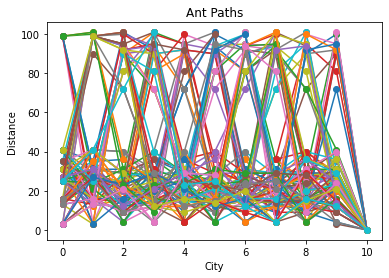

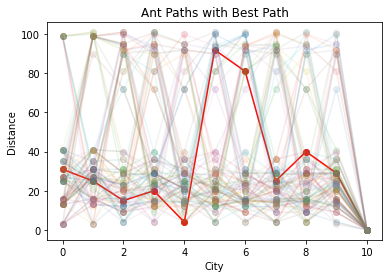

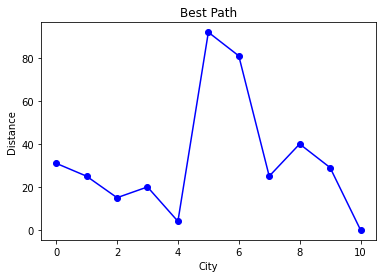


Tempo de execução:  139.55237936973572

Number of ants:  100
Number of iterations:  200
Number of cities:  10
Pheromone importance coefficient (Alpha):  0.4
Heuristic importance coefficient (Beta):  0.1
Pheromone evaporation rate (Rho):  0.6
Modularization Quality (MQ):  1.0


In [66]:
# Definindo a matriz de distâncias
num_cities = 10

# Definir uma matriz de distâncias estática
distances = np.array([
    [0, 29, 20, 21, 16, 31, 100, 12, 4, 31],
    [29, 0, 15, 29, 28, 40, 72, 21, 29, 41],
    [20, 15, 0, 15, 14, 25, 81, 9, 23, 27],
    [21, 29, 15, 0, 4, 12, 92, 12, 25, 13],
    [16, 28, 14, 4, 0, 16, 94, 9, 20, 16],
    [31, 40, 25, 12, 16, 0, 95, 24, 36, 3],
    [100, 72, 81, 92, 94, 95, 0, 90, 101, 99],
    [12, 21, 9, 12, 9, 24, 90, 0, 15, 25],
    [4, 29, 23, 25, 20, 36, 101, 15, 0, 35],
    [31, 41, 27, 13, 16, 3, 99, 25, 35, 0]
])

# Definir uma matriz de penalidades estáticas
penalty_matrix = np.array([
    [1, 1, 1, 2, 1, 1, 2, 1, 1, 2],
    [1, 1, 1, 1, 2, 1, 1, 1, 1, 1],
    [1, 2, 1, 1, 1, 1, 1, 1, 2, 1],
    [2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [1, 1, 2, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 2, 1, 2, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 1, 1, 1, 1, 1, 1, 2, 1, 1]
])

# Configuração do algoritmo ACO
num_iterations = 20
num_ants = 20
rho = 0.6
alpha = 0.4
beta = 0.1
q = 100

# Criando uma instância de AntColonyOptimization
aco = AntColonyOptimization(num_ants, num_iterations, num_cities, alpha, beta, rho, q)

# Definindo a matriz de distâncias
aco.distances = distances

# Executar o algoritmo ACO sem aplicar penalidade
aco.ACO_run()



# Aplicar a penalidade
aco.apply_penalty(penalty_matrix)

# Executar o algoritmo ACO com a penalidade aplicada
aco.ACO_run()

aco.print_results()
aco.show_ant_paths()
aco.show_ant_paths_with_best()
aco.plot_results()

mq = aco.calculate_MQ()

fim = time.time()
print("")
print("Tempo de execução: ", fim - inicio)
print("")
print("Number of ants: ", num_ants)
print("Number of iterations: ", num_iterations)
print("Number of cities: ", num_cities)
print("Pheromone importance coefficient (Alpha): ", alpha)
print("Heuristic importance coefficient (Beta): ", beta)
print("Pheromone evaporation rate (Rho): ", rho)
print("Modularization Quality (MQ): ", mq)

## Claro! Vou explicar o que cada método faz na classe AntColonyOptimization:

#### __init__(self, num_ants, num_iterations, num_cities, alpha=1.0, beta=1.0, rho=0.5, q=100): 
É o método construtor da classe. Ele inicializa os parâmetros da otimização por colônia de formigas, como o número de formigas, número de iterações, número de cidades, parâmetros de importância do feromônio e heurística, taxa de evaporação do feromônio e quantidade de feromônio depositada por formiga. Além disso, cria matrizes para armazenar as distâncias entre cidades, o feromônio e o caminho percorrido por cada formiga. Também define as variáveis para armazenar o melhor caminho encontrado e a melhor distância encontrada.

#### calculate_distance(self, city_a, city_b): 
Calcula a distância entre duas cidades com base na matriz de distâncias.

#### update_pheromone(self): 
Atualiza a matriz de feromônio com base nos caminhos percorridos pelas formigas. Realiza a evaporação do feromônio existente e deposita feromônio adicional nos trechos percorridos pelas formigas que encontraram um caminho melhor.

#### choose_next_city(self, ant, current_city): 
Escolhe a próxima cidade a ser visitada pela formiga com base nas informações de feromônio e heurística. A escolha é feita de forma probabilística, levando em consideração os valores de feromônio e heurística das cidades não visitadas.

#### ACO_run(self): 
Executa o algoritmo de otimização por colônia de formigas. Durante as iterações, as formigas são inicializadas com cidades de partida aleatórias e escolhem as próximas cidades a serem visitadas com base no método choose_next_city. Após cada iteração, o feromônio é atualizado com base nos caminhos percorridos pelas formigas usando o método update_pheromone.

#### apply_penalty(self, penalty_matrix): 
Aplica uma penalidade ao feromônio com base em uma matriz de penalidades fornecida. Essa função pode ser usada para ajustar o feromônio de acordo com algum critério específico.

#### plot_results(self): 
Plota o melhor caminho encontrado no gráfico, mostrando a distância percorrida em função das cidades visitadas. O gráfico exibe o caminho encontrado pelas formigas, onde a cidade de partida é adicionada ao final do caminho para formar um circuito completo.

#### print_results(self): 
Imprime na saída padrão o melhor caminho encontrado e a melhor distância encontrada.

#### calculate_MQ(self): 
Calcula a modularidade do grafo representado pelas conexões entre as cidades percorridas pelas formigas. A modularidade é uma medida de quão bem o grafo pode ser dividido em módulos ou comunidades.

#### show_ant_paths(self): 
Plota os caminhos percorridos por cada formiga no gráfico, mostrando a distância percorrid